In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import os
import glob
sys.path.append("../../code")
sys.path.append("../../analysis")

In [2]:
from datetime import datetime, timedelta

In [22]:
from analysis.grouping import time_bin_cityprotect_incident_types

In [27]:
prop_list = ["Breaking & Entering", "Property Crime", "Theft of Vehicle", "Theft from Vehicle", "Theft"]
violent_list = ["Assault", "Robbery", "Sexual Offense", "Homicide", "Rape"]

In [7]:
scc = pd.read_pickle("../../data/clean_data/SCCSheriff_2017_2022_inferredCity.pkl")

In [8]:
scc2 = pd.read_pickle("../../data/clean_data/SCCSheriff_2023Q1-3_inferred_cities.pkl")

In [9]:
scc = pd.concat([scc, scc2], axis=0)

In [10]:
scc.columns

Index(['ccn', 'date', 'updateDate', 'city', 'state', 'postalCode',
       'blocksizedAddress', 'incidentType', 'parentIncidentType', 'narrative',
       'inferredCity', 'postcode'],
      dtype='object')

In [11]:
lah = scc[scc["inferredCity"] == "Los Altos Hills"]

In [15]:
lah["date"].dt.normalize()

159704   2017-08-01
159719   2017-08-01
159776   2017-08-02
159965   2017-08-02
160043   2017-08-02
            ...    
250410   2023-09-29
250397   2023-09-29
250383   2023-09-29
250387   2023-09-29
250370   2023-09-29
Name: date, Length: 8231, dtype: datetime64[ns]

In [16]:
scc["date"].max()

Timestamp('2023-10-01 05:15:36')

In [17]:
lah[lah["date"].dt.normalize() == datetime(2023, 5, 3)]

,ccn,date,updateDate,city,state,postalCode,blocksizedAddress,incidentType,parentIncidentType,narrative,inferredCity,postcode
80699,S231220281,2023-05-03 00:22:45,2023-05-03 12:35:09,SANTA CLARA COUNTY,CA,.,12700 Block CANARIO WAY,SUSPICIOUS PERSON,Other,Call Type: 1066 <br>Description: SUSPICIOUS ...,Los Altos Hills,94022
80662,S231220328,2023-05-03 03:22:38,2023-05-03 12:35:07,SANTA CLARA COUNTY,CA,.,12900 Block LA CRESTA DR,SUSPICIOUS PERSON,Other,Call Type: 1066 <br>Description: SUSPICIOUS ...,Los Altos Hills,94022
80641,S231230006,2023-05-03 07:34:52,2023-05-03 21:01:37,SANTA CLARA COUNTY,CA,.,27400 Block SHERLOCK CT,MISSING PERSON,Other,Call Type: 1065 <br>Description: MISSING PER...,Los Altos Hills,94022
80602,S231230051,2023-05-03 14:18:53,2023-05-04 05:01:50,SANTA CLARA COUNTY,CA,.,BURKE RD,TRAFFIC HAZARD,Traffic,Call Type: 1125 <br>Description: TRAFFIC HAZ...,Los Altos Hills,94022
80604,L231230002,2023-05-03 14:22:39,2023-05-04 05:01:51,SANTA CLARA COUNTY,CA,.,BURKE RD,SERVICE OR AID REQUEST,Other,Call Type: SVC <br>Description: SERVICE OR ...,Los Altos Hills,94022
80612,S231230084,2023-05-03 15:31:24,2023-05-04 05:01:51,SANTA CLARA COUNTY,CA,.,13900 Block LA PALOMA RD,"ALARM, SILENT",Other,"Call Type: 1033S <br>Description: ALARM, SILE...",Los Altos Hills,94022
80595,S231230244,2023-05-03 21:09:51,2023-05-04 05:01:17,SANTA CLARA COUNTY,CA,.,11900 Block MAGDALENA AV,"ALARM, AUDIBLE",Other,"Call Type: 1033A <br>Description: ALARM, AUDI...",Los Altos Hills,94024
80565,S231230291,2023-05-03 23:09:03,2023-05-04 13:01:32,SANTA CLARA COUNTY,CA,.,28600 Block MATADERO CREEK LN,BURGLARY (460),Breaking & Entering,Call Type: 459 <br>Description: BURGLARY (4...,Los Altos Hills,94028


In [28]:
monthly_lah = time_bin_cityprotect_incident_types(lah)

In [29]:
monthly_lah[monthly_lah.columns.intersection(prop_list)].groupby(monthly_lah.index.year).sum().sum(axis=1)

date
2017     71.0
2018     76.0
2019    117.0
2020    108.0
2021     85.0
2022    116.0
2023     77.0
dtype: float64

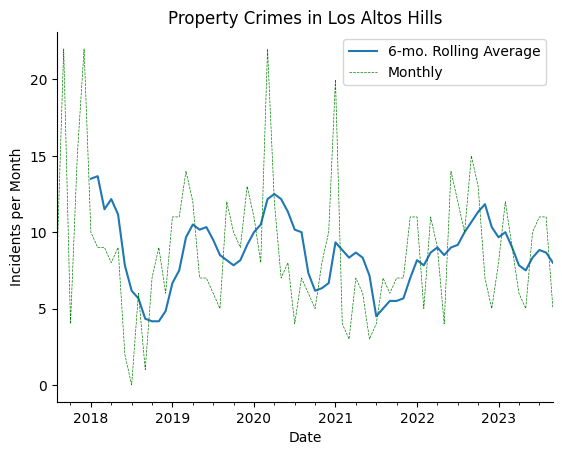

In [87]:
fig, axs = plt.subplots()
monthly_lah[monthly_lah.columns.intersection(prop_list)].sum(axis=1).rolling(window=6).mean().plot(label="6-mo. Rolling Average", ax=axs)
monthly_lah[monthly_lah.columns.intersection(prop_list)].sum(axis=1).plot(label="Monthly", ax=axs, color="g", linestyle="dashed", linewidth=0.5)

axs.set(xlabel="Date", ylabel="Incidents per Month")
axs.set(title="Property Crimes in Los Altos Hills")
plt.legend()
#plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()

In [96]:
patrol_start = np.array([[datetime(2023, 4, 19), datetime(2023, 4, 19)], [0, 30]])

In [97]:
patrol_start

array([[datetime.datetime(2023, 4, 19, 0, 0),
        datetime.datetime(2023, 4, 19, 0, 0)],
       [0, 30]], dtype=object)

TypeError: plot() got an unexpected keyword argument 'x'

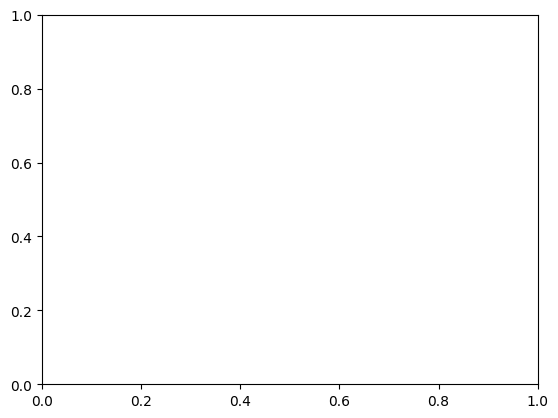

In [100]:
plt.plot(x=patrol_start[0], y=patrol_start[1])

In [112]:
monthly_lah.index

DatetimeIndex(['2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30',
               '2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31',
               '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31',
               '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30',
               '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31',
               '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31',
               '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30',
               '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31',
               '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31',
               '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30',
               '2020-12-31', '2021-01-31', '2021-02-28', '2021-03-31',
               '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31',
               '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30',
               '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
      

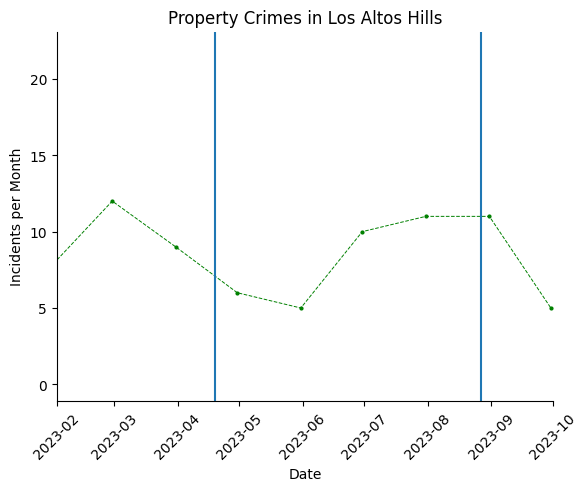

In [120]:
fig, axs = plt.subplots()
#monthly_lah[monthly_lah.columns.intersection(prop_list)].sum(axis=1).plot(label="Los Altos Hills", ax=axs,
                                                                          # color="g", linestyle="dashed", linewidth=0.5)
plt.scatter(x=monthly_lah.index, y=monthly_lah[monthly_lah.columns.intersection(prop_list)].sum(axis=1), 
            s=4, color = "g")
plt.plot(monthly_lah.index, monthly_lah[monthly_lah.columns.intersection(prop_list)].sum(axis=1),
         linestyle="dashed", linewidth=0.7, color="g" )
plt.axvline(datetime(2023, 4, 19))
plt.axvline(datetime(2023, 8, 27))
axs.set(xlabel="Date", ylabel="Incidents per Month")
axs.set(title="Property Crimes in Los Altos Hills")
axs.set_xlim([datetime(2023, 2, 1), datetime(2023, 10, 1)])
plt.xticks(rotation=45)
#plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()

In [34]:
jan1 = datetime(2023, 1, 1)

In [35]:
query = "date >= @jan1"

In [37]:
lah.query(query)["incidentType"].value_counts()

incidentType
ALARM, AUDIBLE                        443
SUSPICIOUS VEHICLE                    107
DISTURBANCE                           104
SERVICE OR AID REQUEST                 93
PHONE UR OFFICE, OR:                   80
TRAFFIC HAZARD                         56
SUSPICIOUS CIRCUMSTANCES               56
SUSPICIOUS PERSON                      49
PARKING VIOLATION                      42
BURGLARY (460)                         41
ALARM                                  25
VEHICLE ACCIDENT, PROPERTY DAMAGE      19
TRESPASSING                            18
THEFT                                  18
ANIMAL COMPLAINT                       17
ALARM, SILENT                          17
DISTURBANCE, FAMILY                    12
TRAFFIC CONTROL                        10
RECKLESS DRIVING                        9
STRANDED MOTORIST                       9
Other                                   9
ABANDONED VEHICLE                       9
MALICIOUS MISCHIEF                      8
WIRE DOWN            

In [42]:
lah.index

Index([159704, 159719, 159776, 159965, 160043, 160053, 160070, 160123, 160228,
       160267,
       ...
       250546, 250475, 250436, 250413, 250403, 250410, 250397, 250383, 250387,
       250370],
      dtype='int64', length=8231)

In [47]:
tempdf = lah[lah["incidentType"] == "BURGLARY (460)"]

In [49]:
tempdf.groupby(tempdf["date"].dt.year).count()

,ccn,date,updateDate,city,state,postalCode,blocksizedAddress,incidentType,parentIncidentType,narrative,inferredCity,postcode
date,,,,,,,,,,,,
2017,13,13,13,13,13,13,13,13,13,13,13,0
2018,28,28,28,28,28,28,28,28,28,28,28,0
2019,41,41,41,41,41,41,41,41,41,41,41,0
2020,30,30,30,30,30,30,30,30,30,30,30,0
2021,20,20,20,20,20,20,20,20,20,20,20,0
2022,49,49,49,49,49,49,49,49,49,49,49,0
2023,41,41,41,41,41,41,41,41,41,41,41,41


In [54]:
scc["year"] = scc["date"].dt.year

In [74]:
lah_prop = lah[lah["incidentType"].isin(x.upper() for x in ["Burglary (460)", "Theft", "Stolen Vehicle", "Vehicle Burglary"])]

In [76]:
pd.pivot_table(lah_prop, values="ccn", index="year", columns=["incidentType"], aggfunc="count")

incidentType,BURGLARY (460),STOLEN VEHICLE,THEFT,VEHICLE BURGLARY
year,,,,
2017,13,1,33,6
2018,28,5,17,3
2019,41,2,34,9
2020,30,2,36,13
2021,20,6,38,7
2022,49,2,38,1
2023,41,5,18,1


In [79]:
scc["date"].max()

Timestamp('2023-10-01 05:15:36')

In [39]:
monthly_lah[monthly_lah["incidentType"] == "BURGLARY (460)"].groupby(monthly_lah.index.year).sum().sum(axis=1)

KeyError: 'incidentType'